In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans

file_path = 'cleaning_notebook/AB_cleaned_formatted.xlsx'
sheet_name = 'Sheet1'

df = pd.read_excel(file_path, sheet_name=sheet_name)

In [2]:
df


,retail_store_id,avg_monthly_revenue,avg_monthly_volume,avg_monthly_promo_revenue,avg_monthly_transactions,avg_basket_spend,BABYCARE,BAKERY (SELF SERVICE),BAKERY (SERVICE),BEVERAGES WITH ALCOHOL,...,Maintenance,Routine,Stock-Up,Top-Up,Floors,# of check-outs,Parking (binary),SQM Ranges,WI,Location
0,1,7.563410e+04,3.854959e+04,462.776667,17816.666667,4.278748,0.010866,0.047504,0.000805,0.156806,...,0.005909,0.078722,0.000683,0.914686,0,2,0,0,96.9,4
1,2,1.296468e+05,7.150905e+04,30303.014167,11282.750000,11.462031,0.012706,0.053467,0.000655,0.029476,...,0.110837,0.350977,0.026063,0.512122,0,3,0,0,99.7,3
2,3,1.168685e+05,6.325381e+04,26844.837500,9471.666667,12.332127,0.009491,0.055975,0.000733,0.042603,...,0.120427,0.345028,0.029810,0.504736,1,2,0,0,139.1,3
3,4,2.505543e+05,1.360499e+05,64626.584167,20543.833333,12.183819,0.013377,0.042843,0.000092,0.039973,...,0.116928,0.362198,0.025865,0.495008,0,4,0,0,125.1,3
4,5,1.835056e+05,1.044589e+05,36642.183333,19416.750000,9.578462,0.011158,0.050433,0.000943,0.066921,...,0.078754,0.298622,0.015821,0.606803,0,3,0,0,134.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,315,8.375183e+05,3.888288e+05,248192.440000,35454.666667,23.540322,0.012518,0.045696,0.015668,0.036066,...,0.192859,0.349761,0.117247,0.340133,3,7,1,8,113.5,3
315,316,1.262307e+06,5.227121e+05,368724.447500,34172.166667,36.664609,0.012851,0.031008,0.001386,0.059791,...,0.185583,0.270469,0.199980,0.343969,0,19,1,8,102.1,5
316,317,2.768504e+06,1.085884e+06,692705.075833,58806.166667,46.806846,0.010141,0.033872,0.002923,0.057434,...,0.198615,0.274956,0.246618,0.279810,0,22,1,8,210.6,2
317,318,9.589441e+05,4.200410e+05,290426.755000,25690.500000,36.958880,0.016684,0.036054,0.001928,0.052117,...,0.181815,0.269442,0.230239,0.318504,1,17,1,8,99.8,5


In [30]:
def standarizeMethod(df):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)
    
    return data_scaled_df

def PCAImplementation(df, n, columns):
    # Get n components
    pca = PCA(n_components = n)  
    pca_result = pca.fit_transform(df)

    pca_df = pd.DataFrame(data=pca_result, columns=columns)
    print("Explained Variance Ratio:", pca.explained_variance_ratio_)
    
    return pca_df

def correlationImplementation(x_axis_df, y_axis_df):
    # Calculating pairwise correlations - works best with original dataset
    correlation_matrix = pd.DataFrame(
        index=y_axis_df.columns,
        columns=x_axis_df.columns,
        data=[[y_axis_df[y].corr(x_axis_df[x]) for x in x_axis_df] for y in y_axis_df]
    )

    
    # Print the correlation matrix
    print("Correlation Matrix:")
    print(correlation_matrix)
    
    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='viridis', cbar=True, square=True  )
    
    plt.title('Correlation Matrix Heatmap', fontsize=16)
    plt.show()



In [31]:

behavior_columns = [
    "Maintenance", 
    "Routine", 
    "Stock-Up", 
    "Top-Up"
]

size_columns = [  
    "Floors", 
    "# of check-outs", 
    "Parking (binary)", 
    "SQM Ranges"
]




Number of dropped rows: 0
Correlation Matrix:
               Floors  # of check-outs  Parking (binary)  SQM Ranges
Maintenance -0.086628         0.409969          0.646810    0.568484
Routine      0.065717        -0.255318         -0.041808   -0.173374
Stock-Up    -0.117981         0.606512          0.685070    0.705291
Top-Up       0.082939        -0.436358         -0.644327   -0.583169


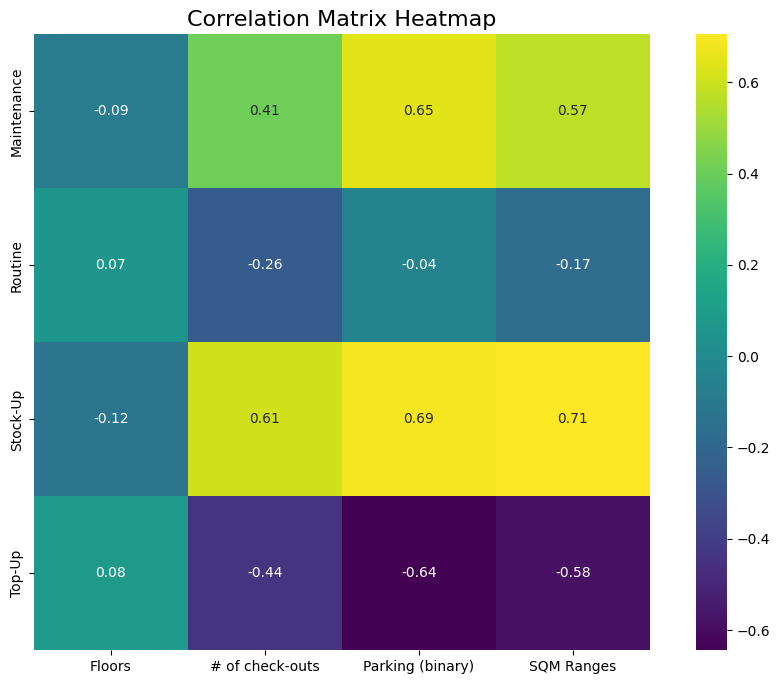

In [32]:
# Removing originaly null values
initial_row_count = len(df)
df = df.replace('Empty', pd.NA)
df = df.dropna()
final_row_count = len(df)
dropped_rows = initial_row_count - final_row_count
print(f"Number of dropped rows: {dropped_rows}")


df = standarizeMethod(df)
behavior_df = df[behavior_columns]
size_df = df[size_columns]

# Step 3: Compute the correlation and plot the heatmap
correlationImplementation(size_df, behavior_df)

In [21]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
import matplotlib.pyplot as plt


In [23]:
# Separate features (size_columns) and target (behavior_columns)
X = df[size_columns]
y = df['Stock-Up']  # Example: Predicting Stock-Up behavior

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Initialize the Decision Tree Regressor
reg = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the model
reg.fit(X_train, y_train)

# Predict on test data
y_pred = reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.4441277959278507


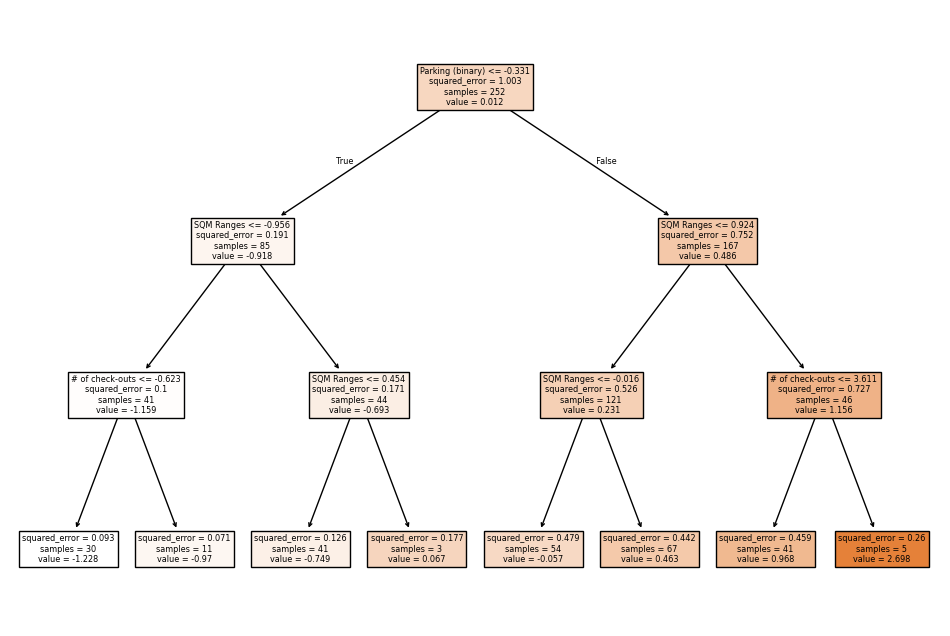

In [26]:
# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(reg, feature_names=size_columns, class_names=True, filled=True)
plt.show()


In [29]:
from sklearn.tree import export_text

tree_rules = export_text(reg, feature_names=size_columns)

# Print the rules as plain text
print(tree_rules)

# Alternatively, save rules to a file
with open("tree_rules.txt", "w") as f:
    f.write(tree_rules)

|--- Parking (binary) <= -0.33
|   |--- SQM Ranges <= -0.96
|   |   |--- # of check-outs <= -0.62
|   |   |   |--- value: [-1.23]
|   |   |--- # of check-outs >  -0.62
|   |   |   |--- value: [-0.97]
|   |--- SQM Ranges >  -0.96
|   |   |--- SQM Ranges <= 0.45
|   |   |   |--- value: [-0.75]
|   |   |--- SQM Ranges >  0.45
|   |   |   |--- value: [0.07]
|--- Parking (binary) >  -0.33
|   |--- SQM Ranges <= 0.92
|   |   |--- SQM Ranges <= -0.02
|   |   |   |--- value: [-0.06]
|   |   |--- SQM Ranges >  -0.02
|   |   |   |--- value: [0.46]
|   |--- SQM Ranges >  0.92
|   |   |--- # of check-outs <= 3.61
|   |   |   |--- value: [0.97]
|   |   |--- # of check-outs >  3.61
|   |   |   |--- value: [2.70]

